## CS-E4820 Machine Learning: Advanced Probabilistic Methods (Spring 2022)

Pekka Marttinen, Prayag Tiwari, Vishnu Raj, Tianyu Cui, Yogesh Kumar, Antti Pöllänen, Louis Filstroff, Alex Aushev, Zheyang Shen, Nikitin Alexander , Sebastiaan De Peuter.

## Exercise 3, due on Tuesday February 8 at 23:50.

### Contents
1. Problem 1: Poisson-Gamma
2. Problem 2: Multivariate Gaussian
3. Problem 3: Posterior of regression weights

## Problem 1: Poisson-Gamma

Suppose you have $N$ i.i.d. observations $\mathbf{x}= \{x_i\}_{i=1}^N$ from a $\operatorname{Poisson}(\lambda)$ distribution with a rate parameter $\lambda$ that has a conjugate prior 

$$\lambda \sim \operatorname{Gamma}(a,b)$$

with the shape and rate hyperparameters $a$ and $b$. Derive the posterior distribution $\lambda|\bf{x}$.

Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```!(imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally! You can use some of the definitions from the exercise description as a reference. The list of valid Latex commands in Jypyter notebook can be found here: http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm




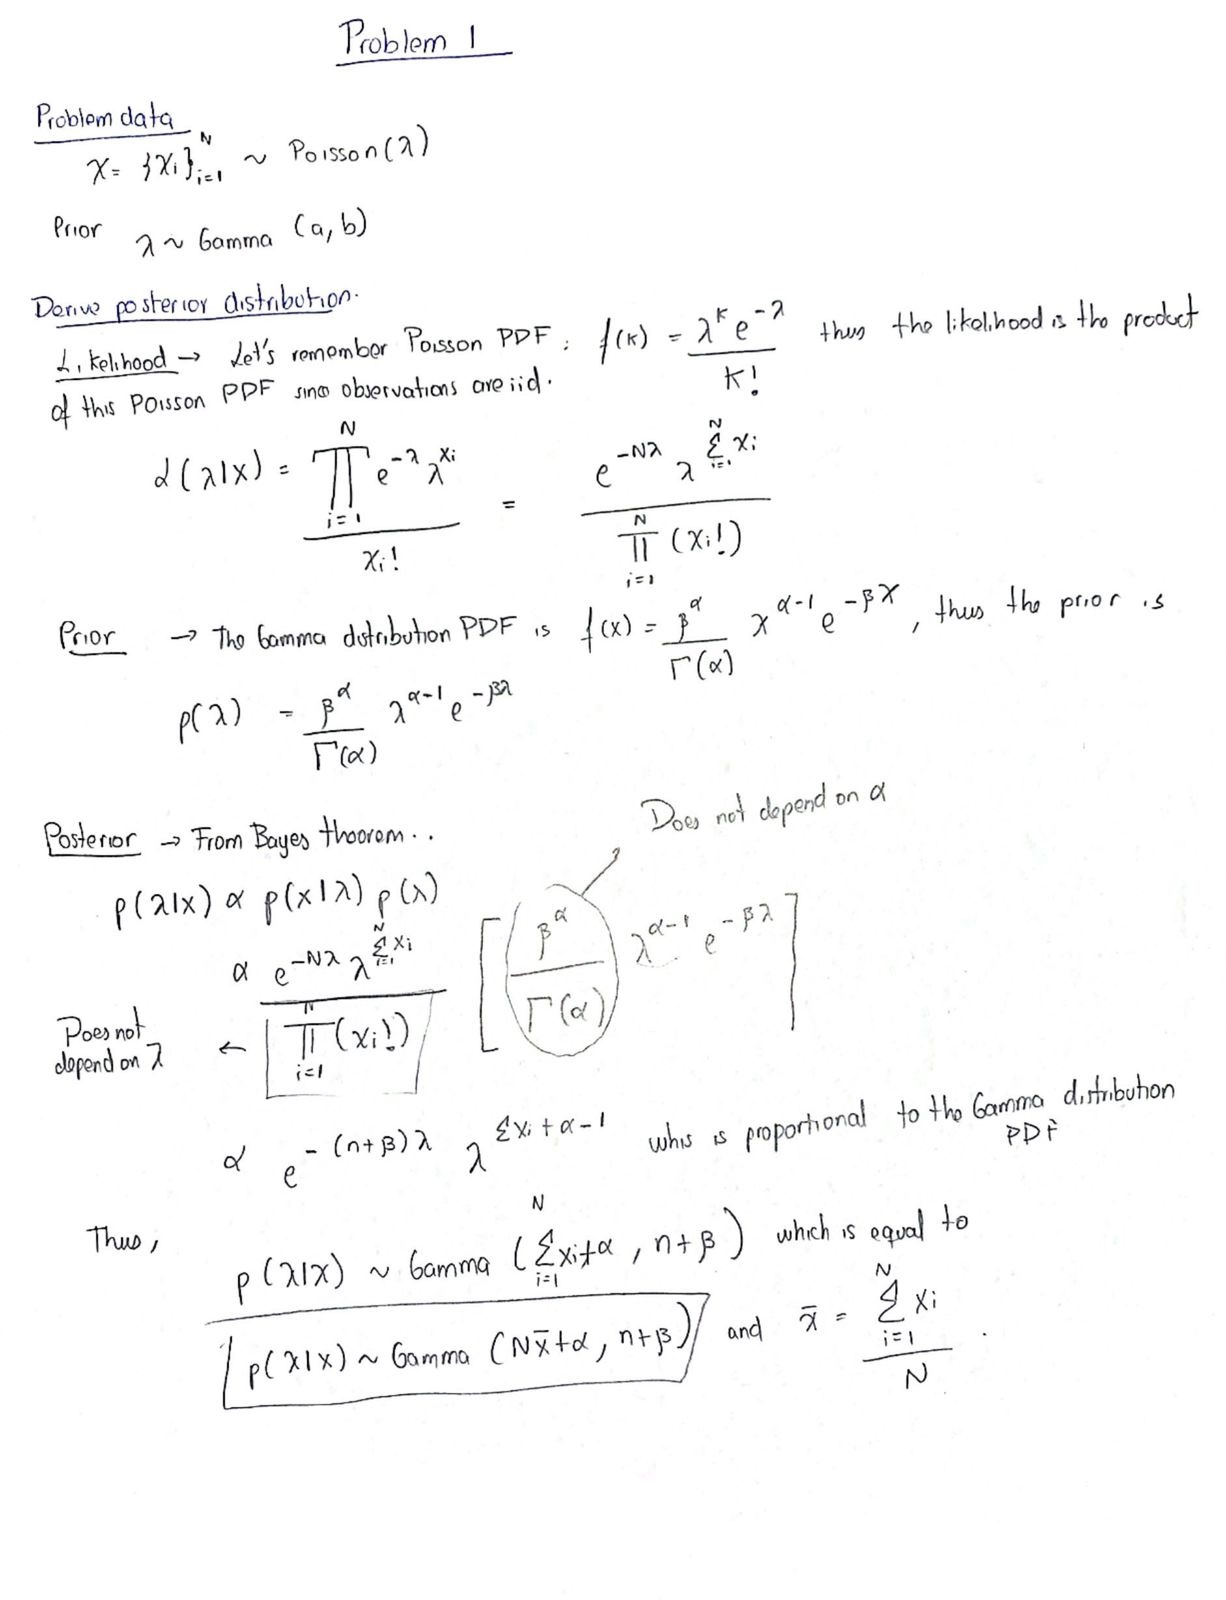

## Problem 2: Multivariate Gaussian

Suppose we have $N$ i.i.d. observations $\mathbf{X} = \{\mathbf{x}_i\}_{i=1}^N$ from a multivariate Gaussian distribution $$\mathbf{x}_i \mid \boldsymbol{\mu} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$$ with unknown mean parameter $\boldsymbol{\mu}$  and a known covariance matrix $\boldsymbol{\Sigma}$. As prior information on the mean parameter we have $$ \boldsymbol{\mu} \sim \mathcal{N}(\mathbf{m_0}, \mathbf{S_0}). $$

__(a)__ Derive the posterior distribution $p(\boldsymbol{\mu}|\mathbf{X})$ of the mean parameter $\boldsymbol{\mu}$. Write your solution in LateX or attach a picture of the solution in the cell below.

__(b)__ Compare the Bayesian estimate (posterior mean) to the maximum likelihood estimate by generating $N=10$ observations from the bivariate Gaussian 
        $$\mathcal{N}\left(\begin{bmatrix}0 \\ 0\end{bmatrix}, \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}\right).$$
For this you can use the Python function [numpy.random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html), making use of the fact that the elements of the bivariate random vectors are independent. In the Bayesian case, use the prior with $\mathbf{m_0} = [0,0]^T$ and $\mathbf{S_0} = [\begin{smallmatrix}0.1 & 0 \\ 0 & 0.1\end{smallmatrix}]$. Report both estimates. Is the Bayesian estimate closer to the true value $\boldsymbol{\mu} = [0,0]^T$? Use the code template given below (after the answer cell) to complete your answer.

Write your solutions to __(a)__ and __(b)__ in LateX or attach a picture in the answer cell provided below. 



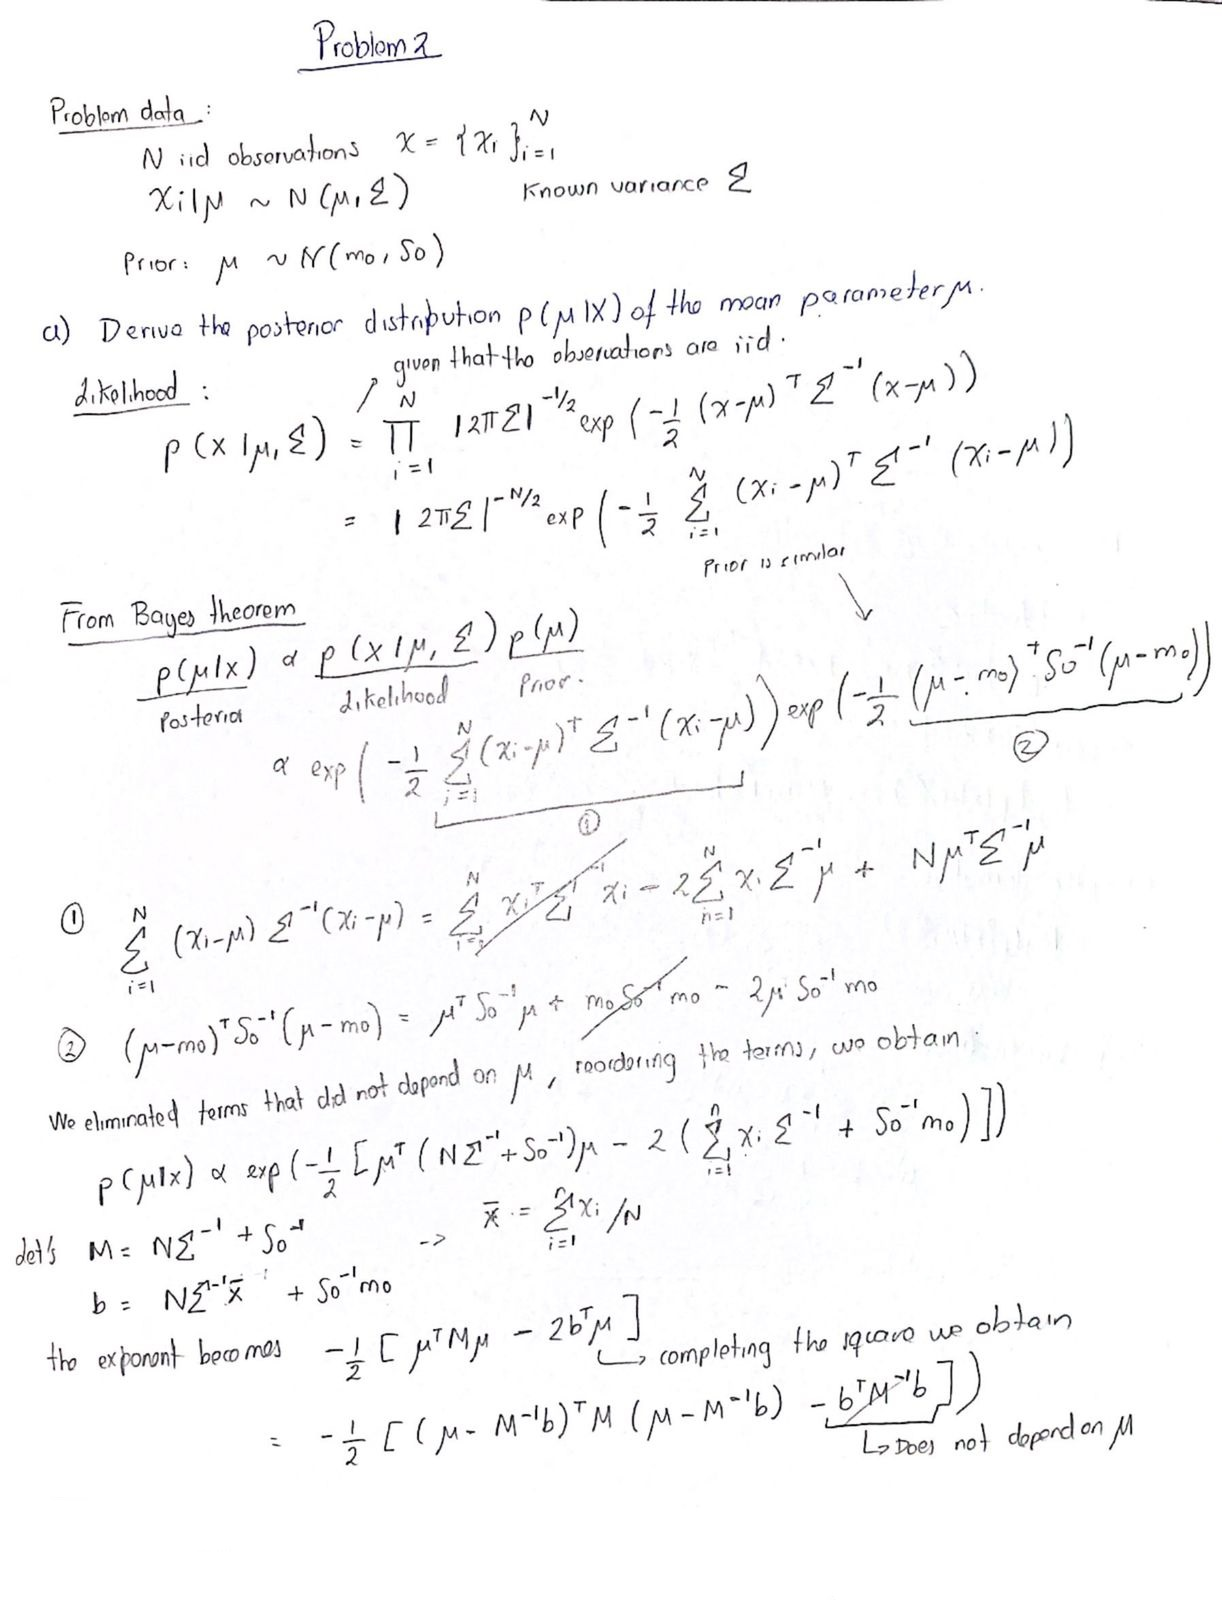

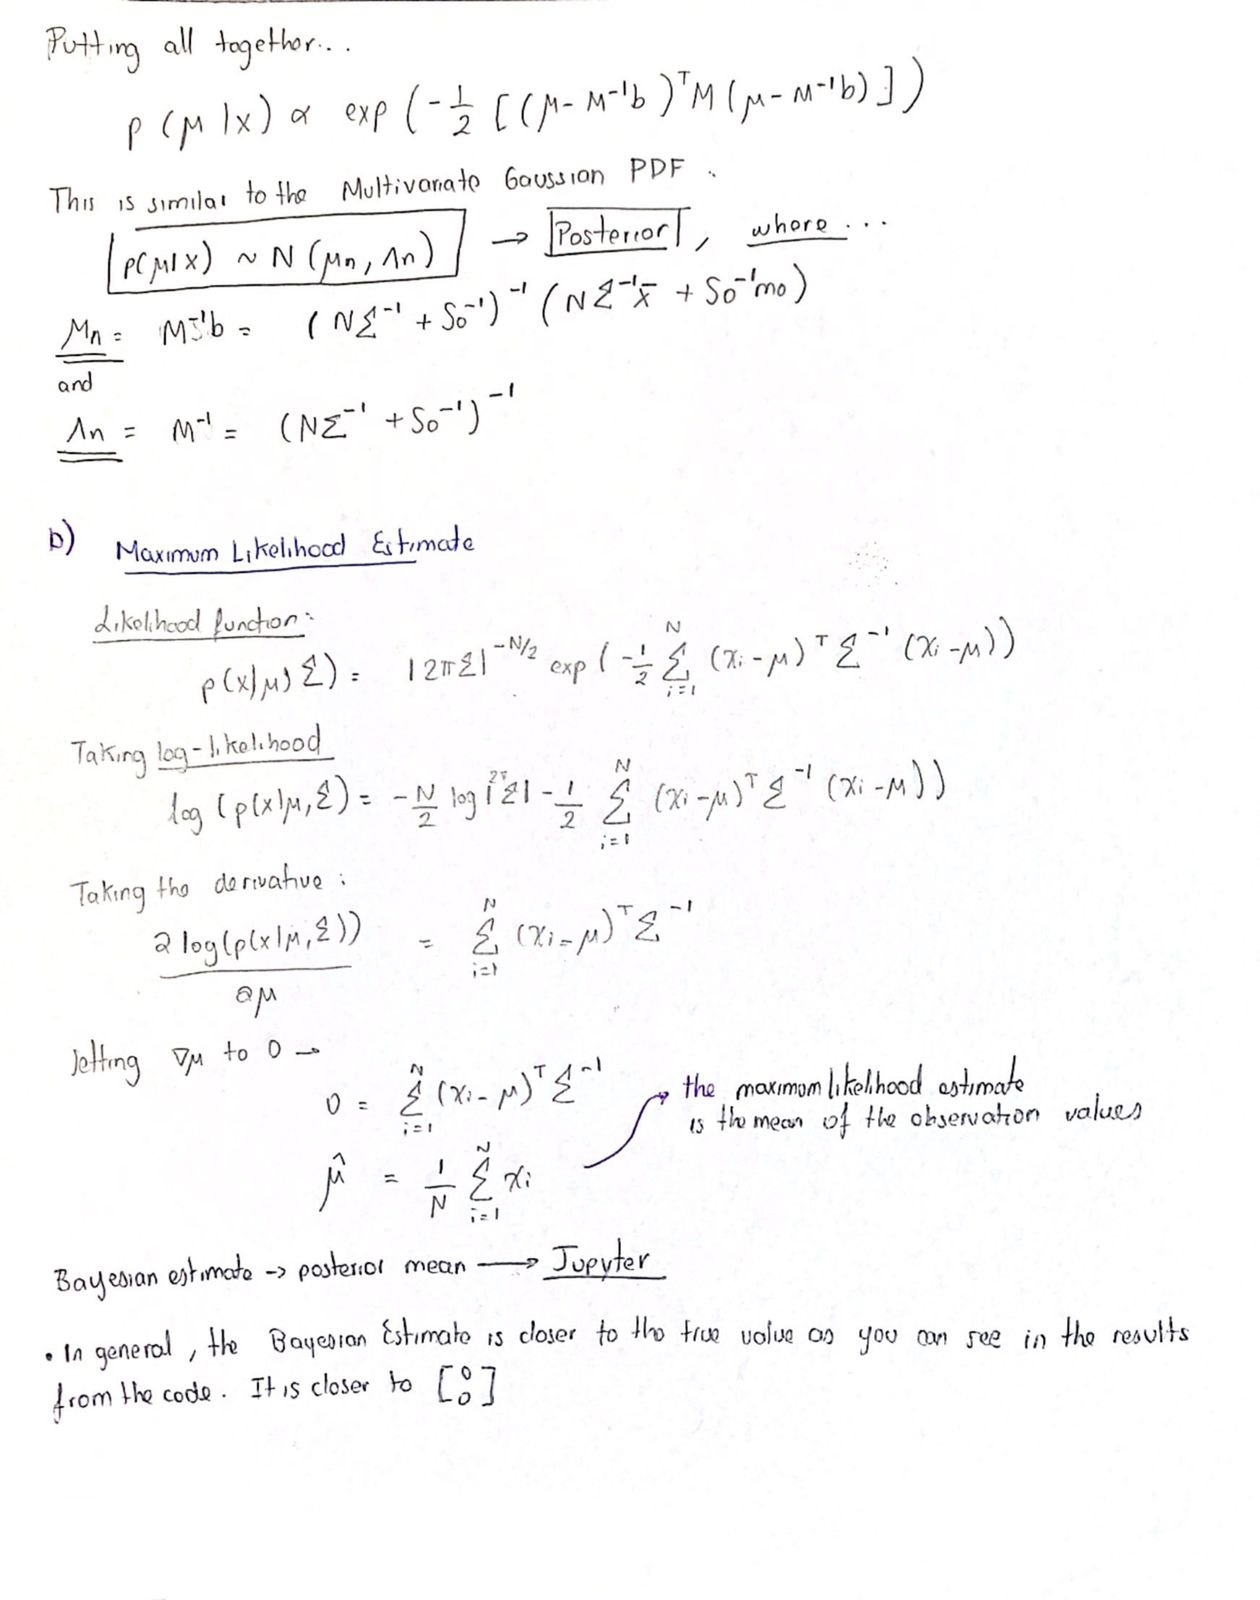

In [2]:
# template for 2(b)
import numpy as np
from numpy.linalg import inv

mean = np.array([[0, 0]])
S0 = np.array([[0.1, 0],[0, 0.1]])
Sigma = np.array([[1, 0],[0, 1]])
N = 10

# Sample N bivariate normal vectors
# compute MLE and also the posterior mean solution

x = np.random.normal(mean[0,0], Sigma[0,0], size=N)
y = np.random.normal(mean[0,1], Sigma[1,1], size=N)


mle = np.array([[np.mean(x), np.mean(y)]])

mean = np.transpose(mean)
mle = np.transpose(mle)


mu_n = np.matmul(inv(inv(S0)+ N*inv(Sigma)),(np.matmul(inv(S0),mean)+ np.matmul(N*inv(Sigma),mle)))
sigma_n = inv(inv(S0)+ N*inv(Sigma))



posterior = np.random.multivariate_normal(np.concatenate(mu_n), sigma_n, size= 100)
posterior_mean = np.array([np.mean(posterior[:,0]),np.mean(posterior[:,1])])

print("mle")
print(mle)
print("Posterior mean")
print(posterior_mean)

mle
[[-0.28419097]
 [-0.24807935]]
Posterior mean
[-0.11082574 -0.10924561]


# Problem 3: Posterior of regression weights

Suppose $y_{i}=\mathbf{w}^{T}\mathbf{x}_{i}+\epsilon_{i},$ for $i=1,\ldots,n,$ where $\epsilon_{i}\sim \mathcal{N}(0,\beta^{-1})$. Assume a prior $$\mathbf{w} \sim \mathcal{N} (\mathbf{0},\alpha^{-1}\mathbf{I}).$$ Use 'completing the square' to show that the posterior of $\mathbf{w}$ is given by $p(\mathbf{w} \mid \mathbf{y}, \mathbf{x}, \alpha, \beta)=\mathcal{N}(\mathbf{w} \mid \mathbf{m}, \mathbf{S}),$ where 
\begin{align*}
    \mathbf{S} &= \left( \alpha \mathbf{I} + \beta \sum_{i=1}^n \mathbf{x}_i \mathbf{x}_i^T \right)^{-1}\;, \\
    \mathbf{m} &= \beta \mathbf{S} \sum_{i=1}^{n} y_i \mathbf{x}_i.
\end{align*}

Write your solution in LateX or attach a picture of the solution in the cell below.


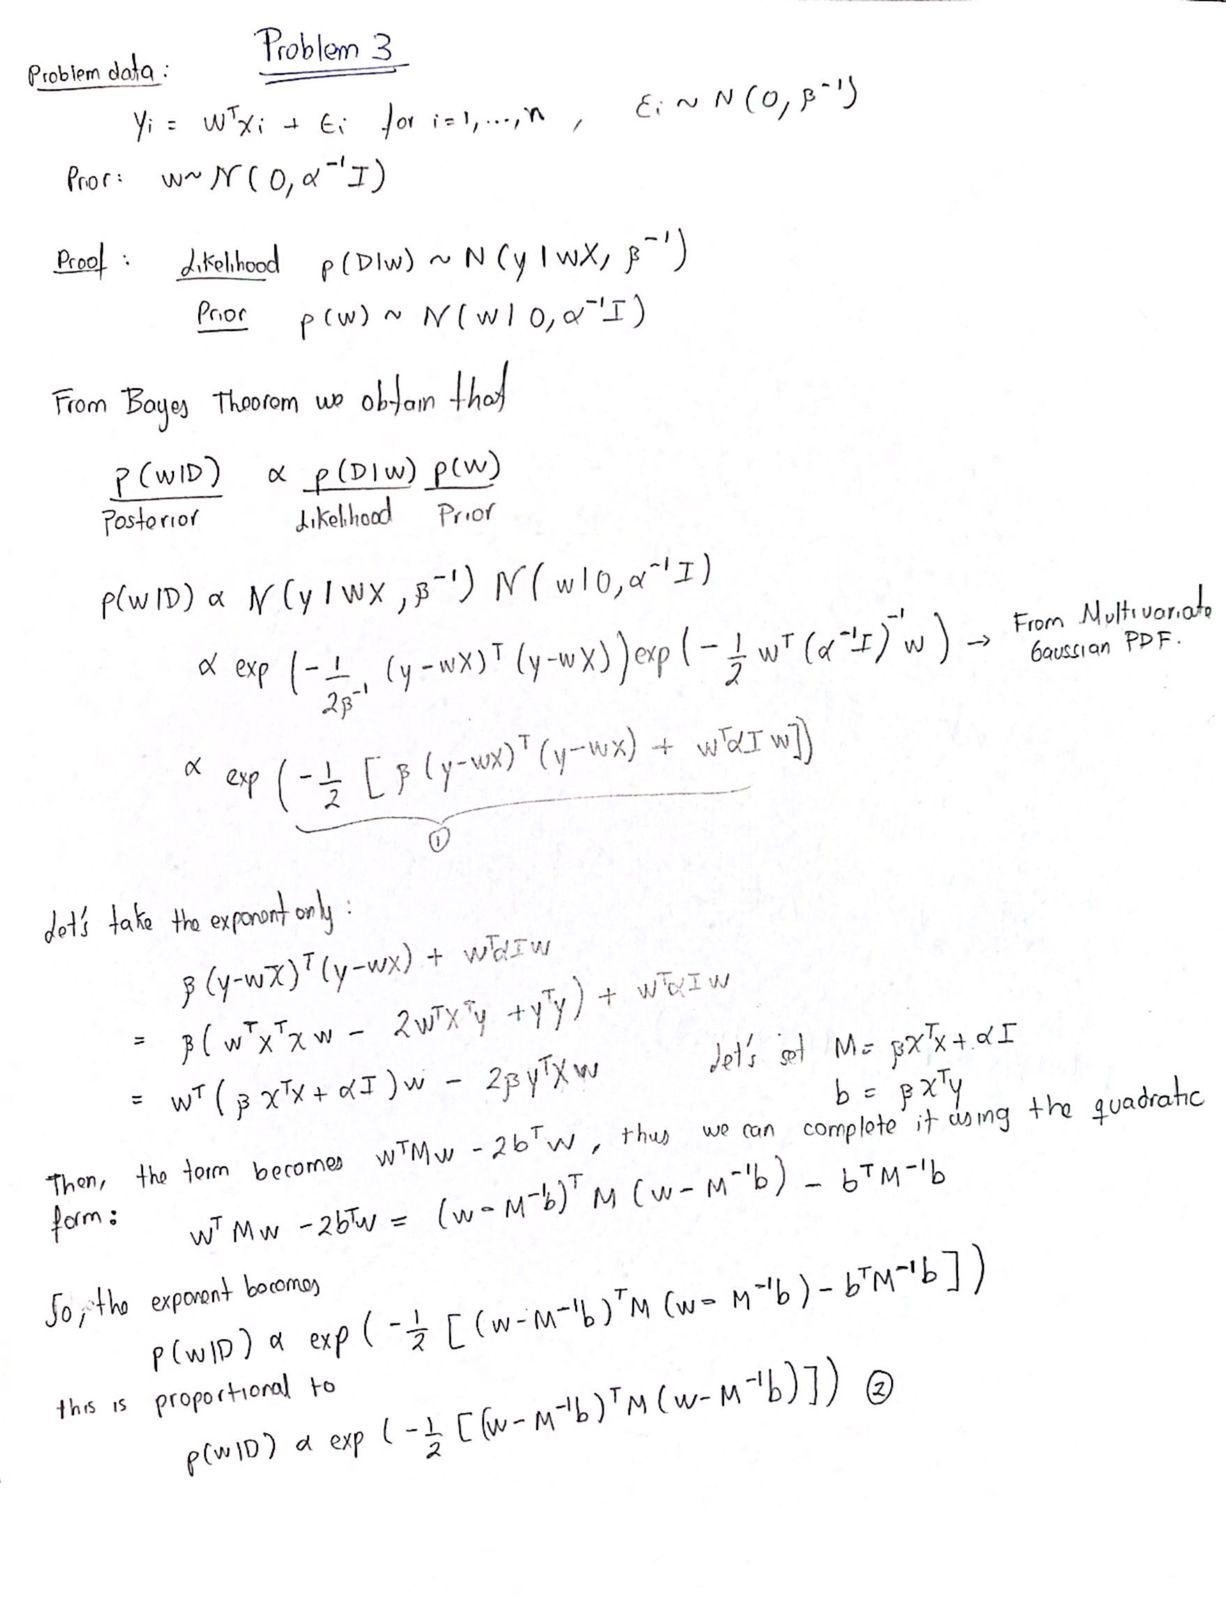

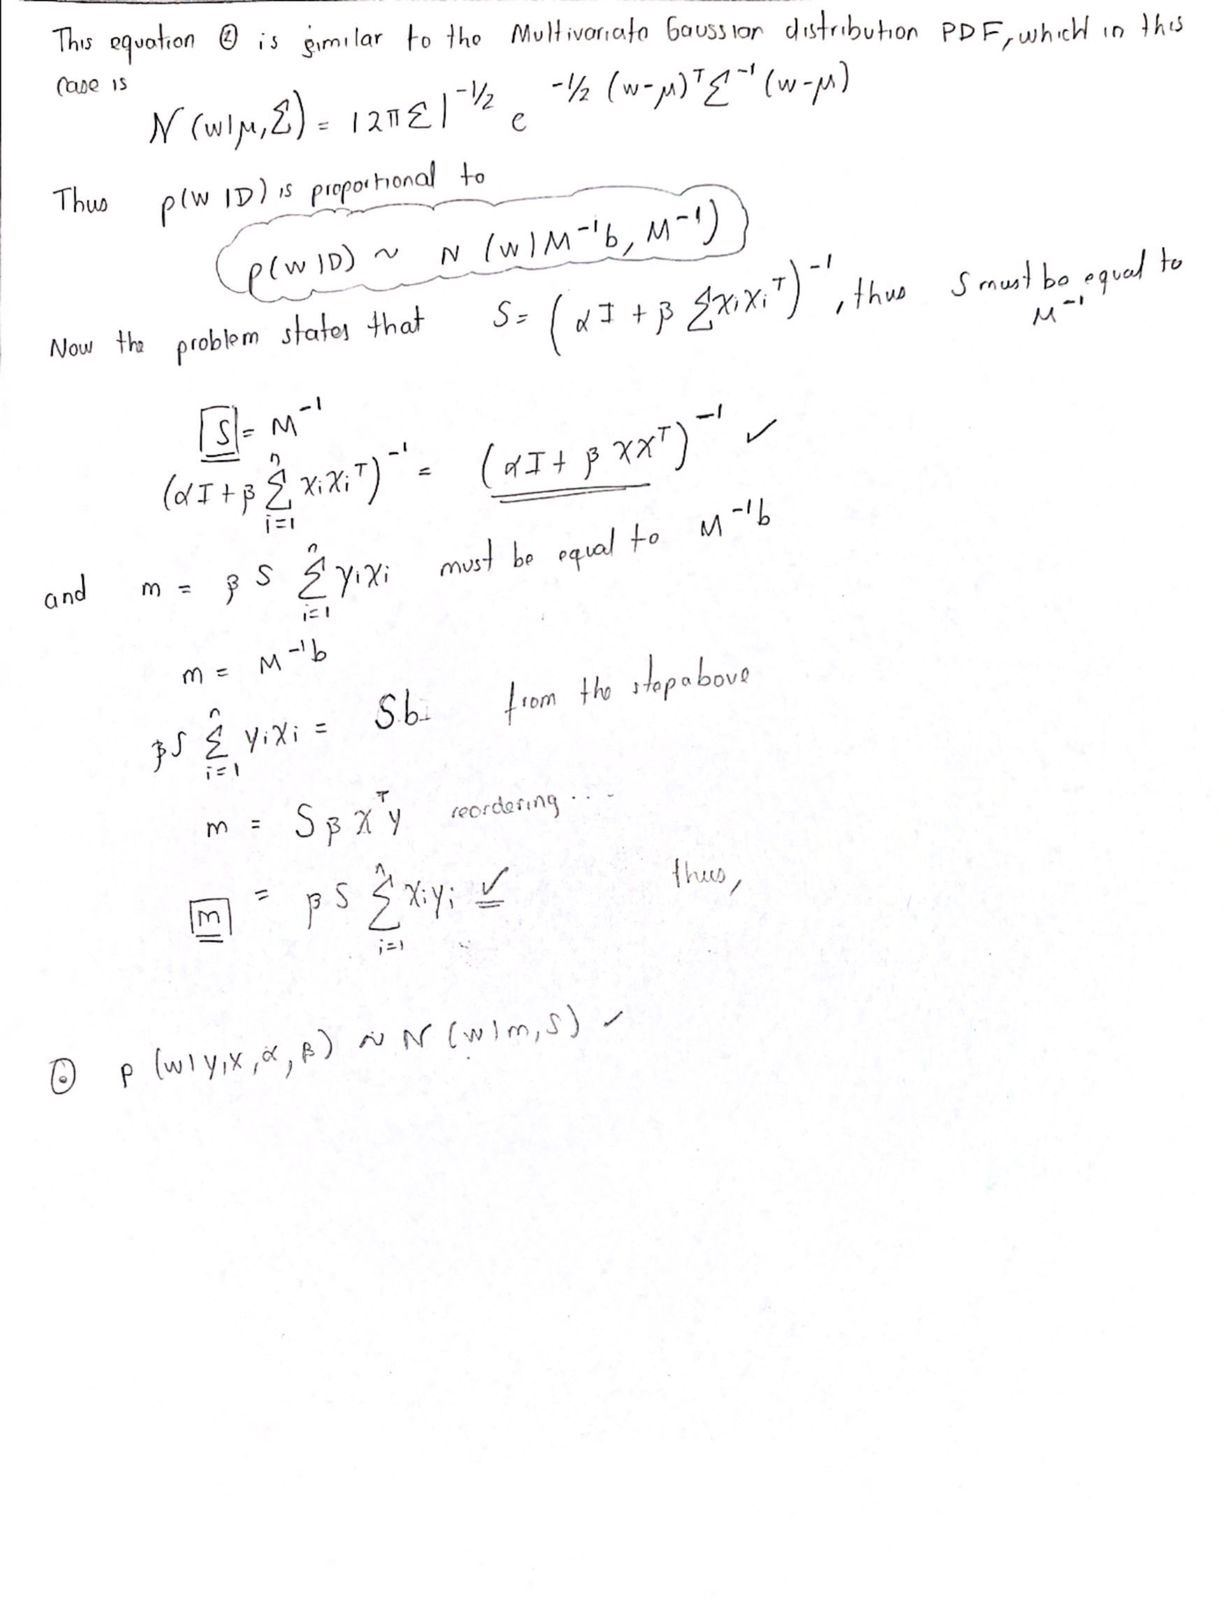